In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import pickle
import joblib
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ML_CA3/dataset/telescope_data.csv")

#COLUMN INFORMATION
1.  fLength:  continuous  # major axis of ellipse [mm]
2.  fWidth:   continuous  # minor axis of ellipse [mm]
3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm]
8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
11.  class:    g,h         # gamma (signal), hadron (background)

In [ ]:
df.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df.shape

(19020, 12)

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
#Understand the size of each class
df.groupby('class').size()

class
g    12332
h     6688
dtype: int64

In [ ]:
d={'g':1,'h':0}
df['c']=df['class'].map(d)

In [ ]:
df.isnull().sum()

fLength     0
fWidth      0
fSize       0
fConc       0
fConc1      0
fAsym       0
fM3Long     0
fM3Trans    0
fAlpha      0
fDist       0
class       0
c           0
dtype: int64

In [ ]:
df.describe()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,c
count,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000,19020.000000
mean,53.250154,22.180966,2.825017,0.380327,0.214657,-4.331745,10.545545,0.249726,27.645707,193.818026,0.648370
std,42.364855,18.346056,0.472599,0.182813,0.110511,59.206062,51.000118,20.827439,26.103621,74.731787,0.477492
min,4.283500,0.000000,1.941300,0.013100,0.000300,-457.916100,-331.780000,-205.894700,0.000000,1.282600,0.000000
25%,24.336000,11.863800,2.477100,0.235800,0.128475,-20.586550,-12.842775,-10.849375,5.547925,142.492250,0.000000
50%,37.147700,17.139900,2.739600,0.354150,0.196500,4.013050,15.314100,0.666200,17.679500,191.851450,1.000000
75%,70.122175,24.739475,3.101600,0.503700,0.285225,24.063700,35.837800,10.946425,45.883550,240.563825,1.000000
max,334.177000,256.382000,5.323300,0.893000,0.675200,575.240700,238.321000,179.851000,90.000000,495.561000,1.000000


#DATA **VISUALIZATION**

In [ ]:
df.columns[:-1]

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')

In [ ]:


# Create an interactive scatter plot for Hillas parameters
fig = px.scatter(df, x='fLength', y='fWidth', color='class',
                 labels={'class': 'Class'})

# Customize the figure layout
fig.update_layout(
    title='Interactive 2D Scatter Plot of Hillas Parameters',
    xaxis_title='fLength',
    yaxis_title='fWidth',
    height=600,
    width=800,
)

# Show the plot
fig.show()


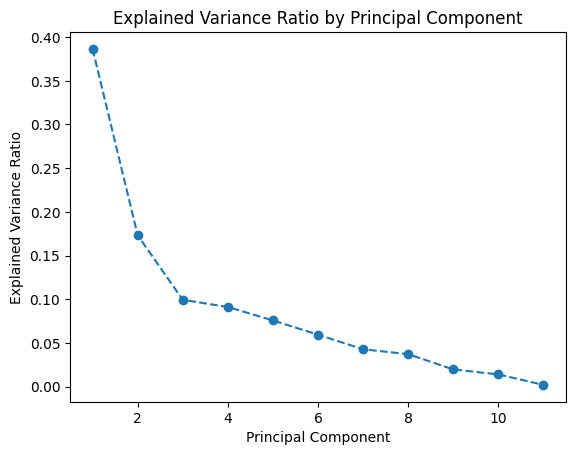

In [ ]:


X = df.select_dtypes(include=['number'])

y = df['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()


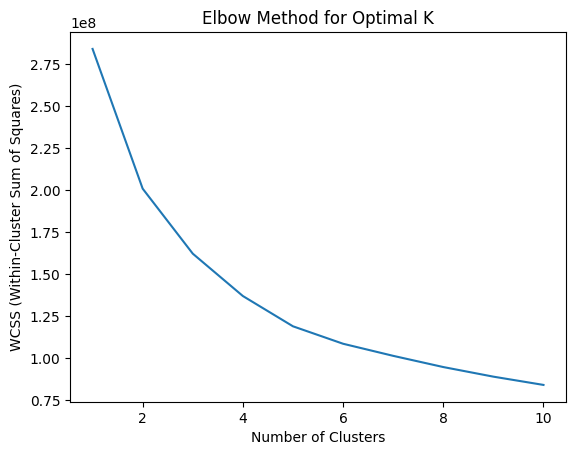

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df.drop(columns=['class'])
wcss = []
for i in range(1, 11):  # Start from 1, not 0
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal K')
plt.show()


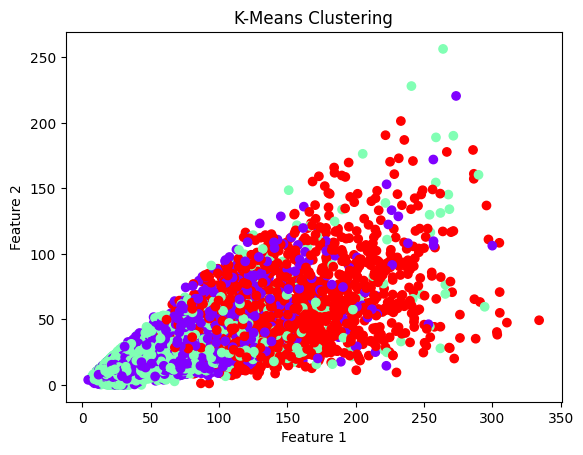

In [ ]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(X)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['cluster'], cmap='rainbow')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

<ipython-input-44-3289113db9d5>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



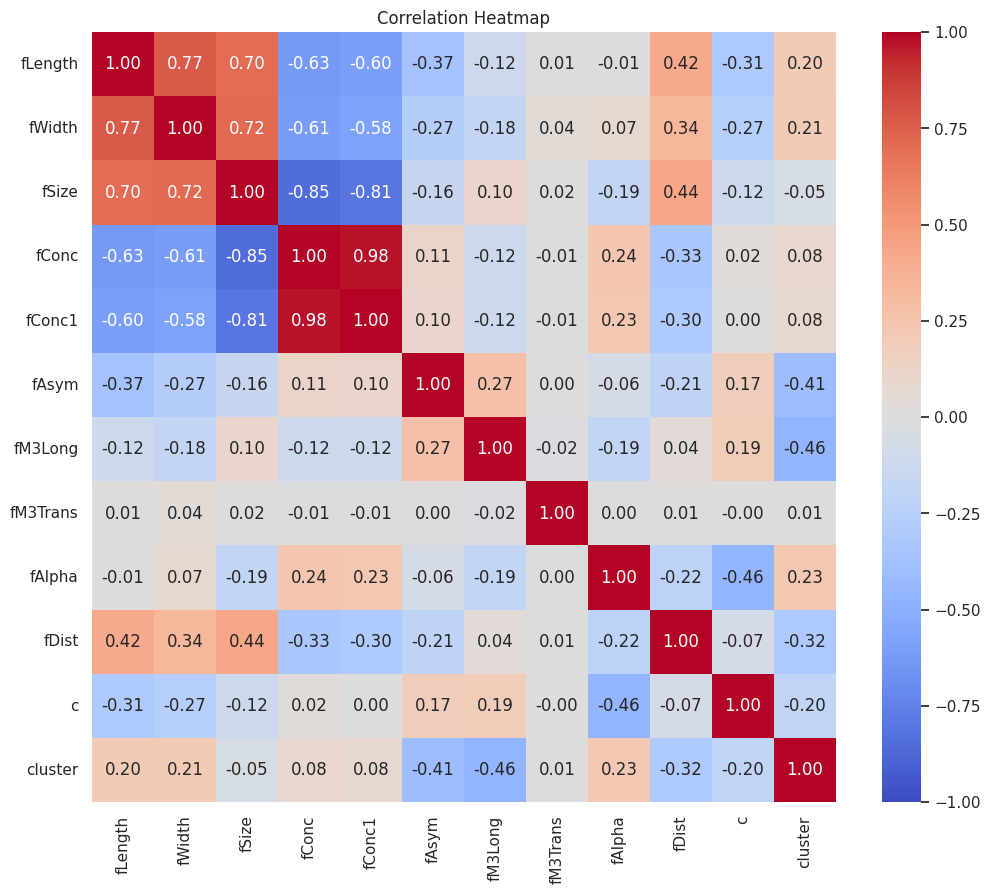

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.set(font_scale=1)
sns.set_style("whitegrid")
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0)
plt.show()

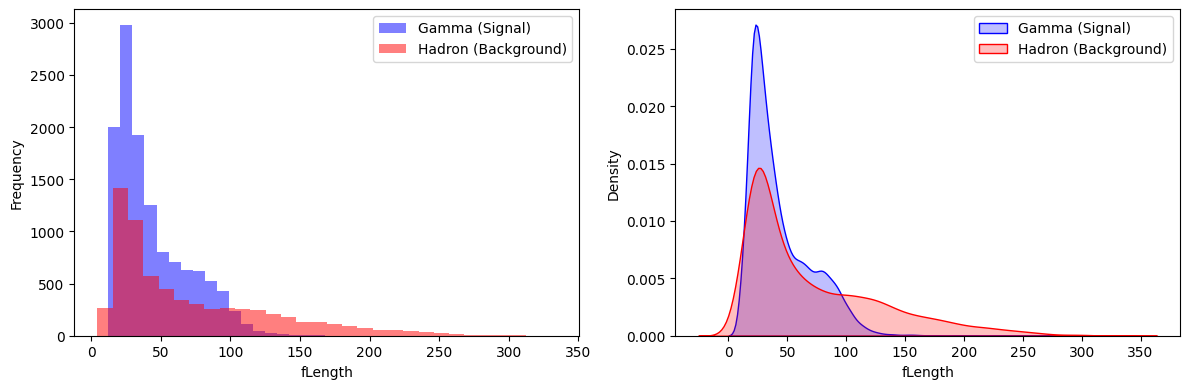

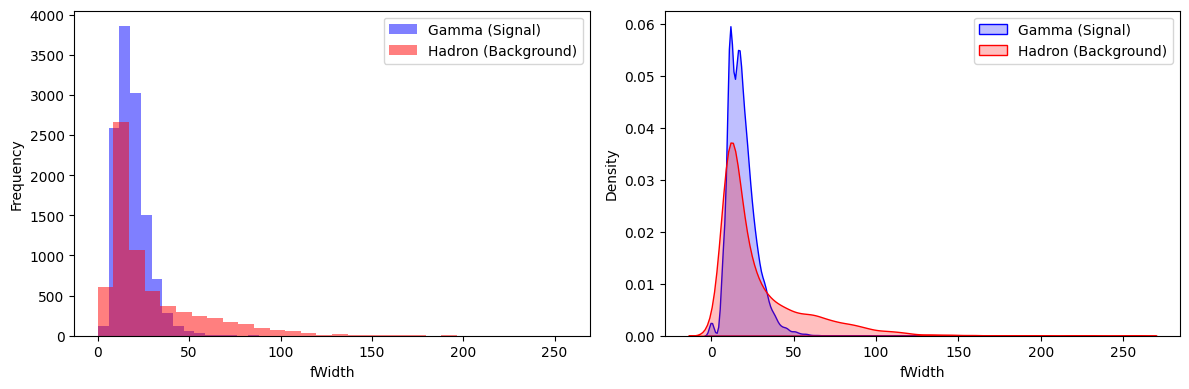

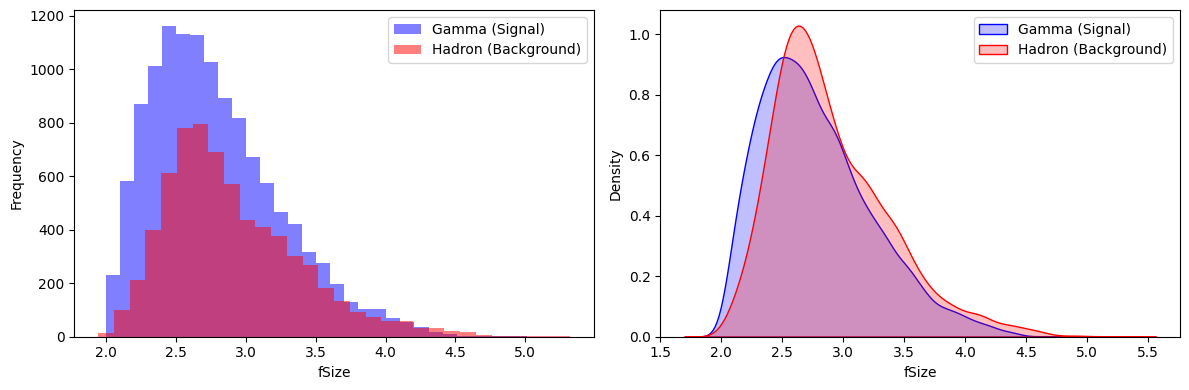

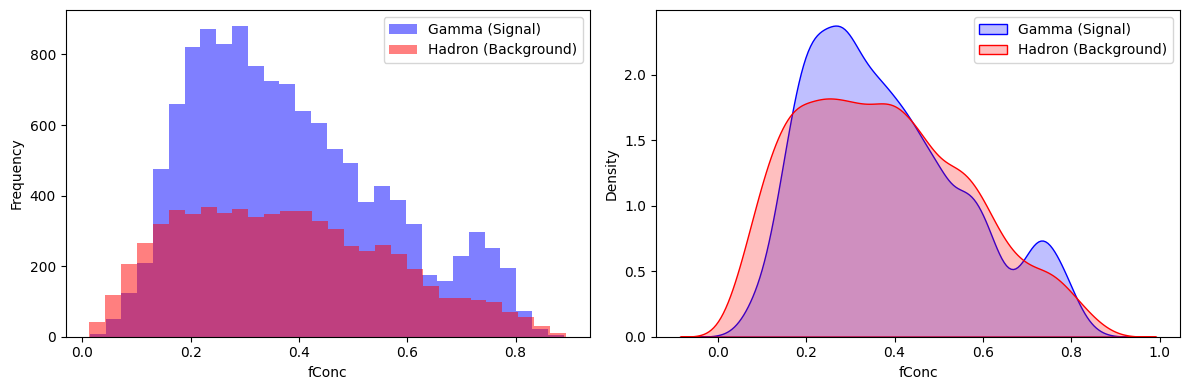

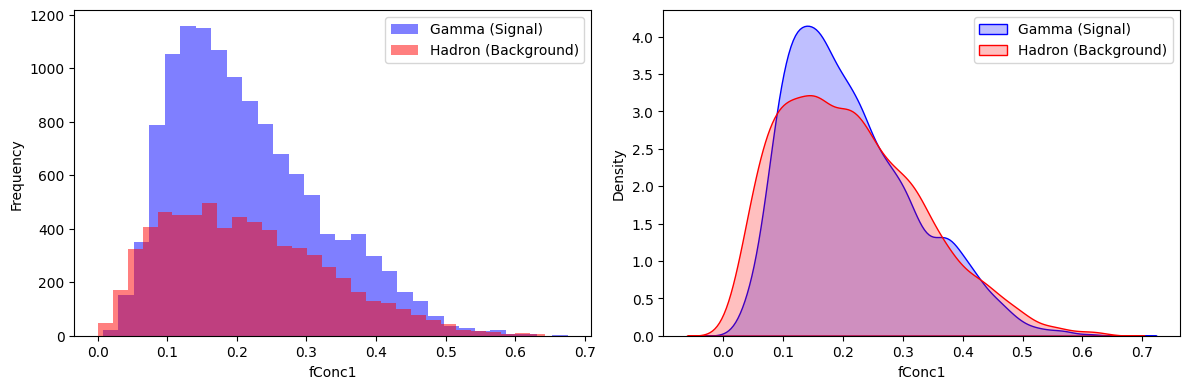

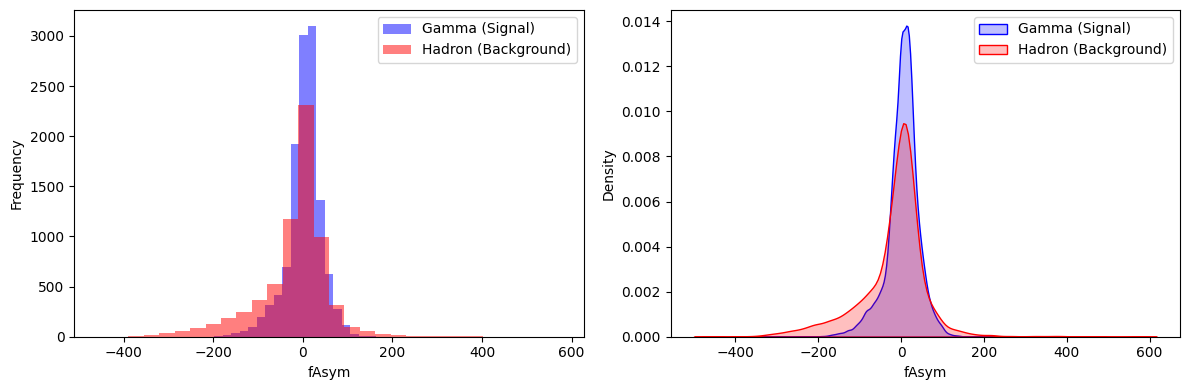

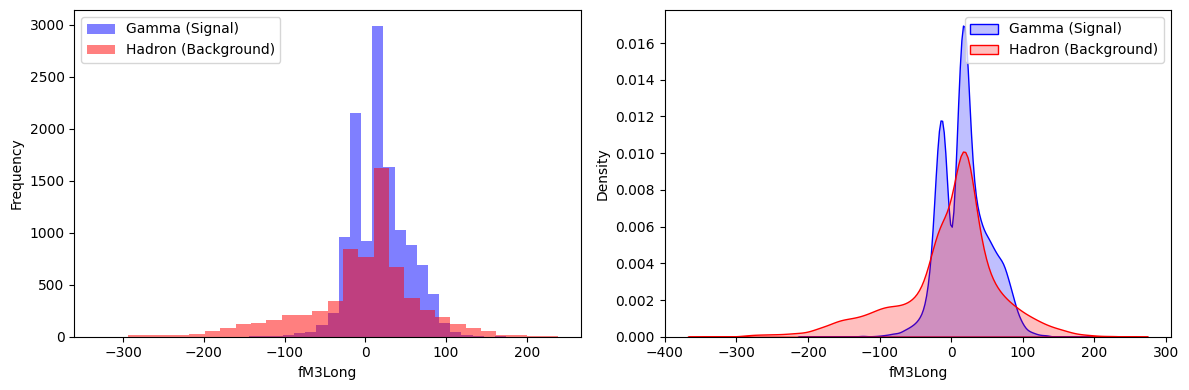

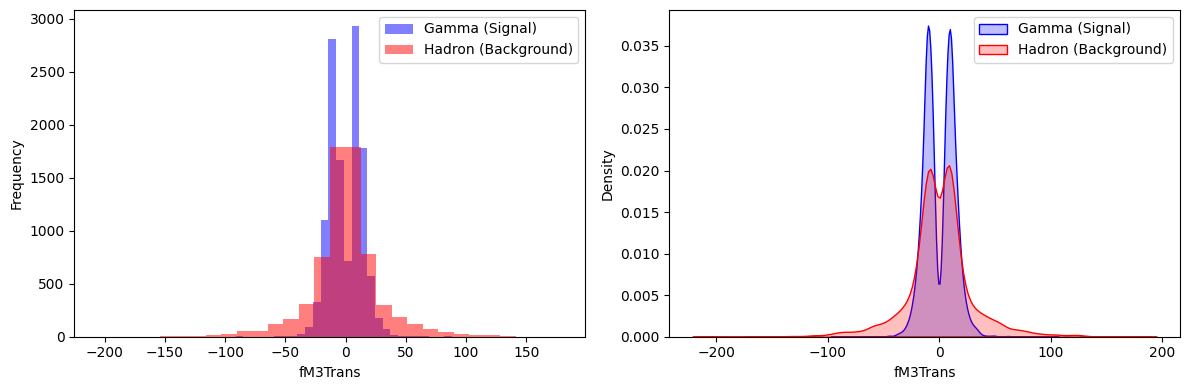

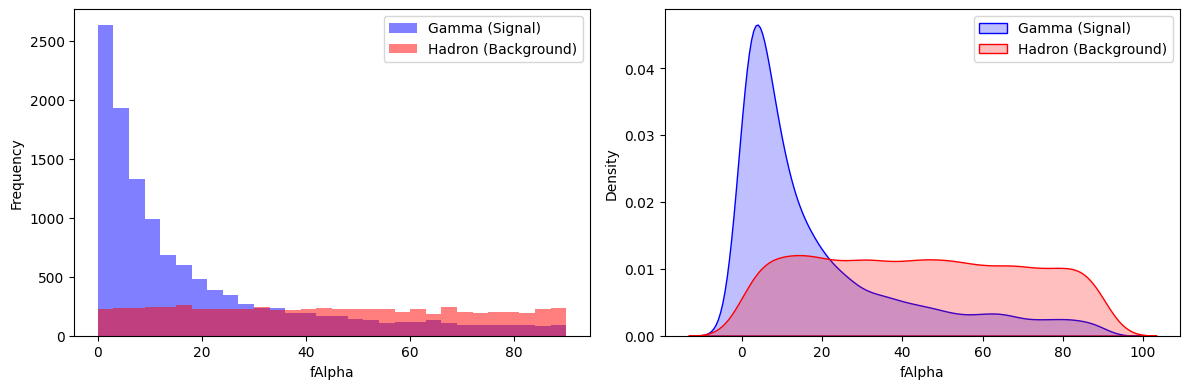

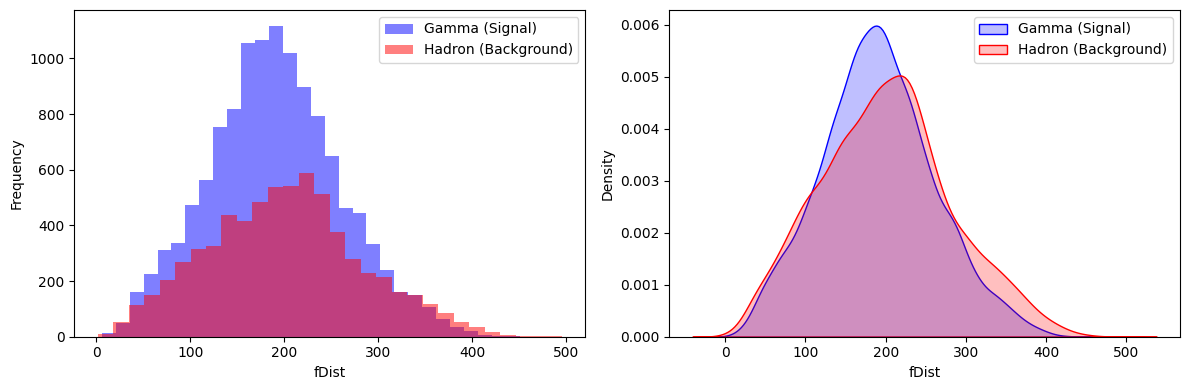

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for attr in df.columns[:-3]:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    axes[0].hist(df[df['class'] == 'g'][attr], bins=30, label='Gamma (Signal)', alpha=0.5, color='blue')
    axes[0].hist(df[df['class'] == 'h'][attr], bins=30, label='Hadron (Background)', alpha=0.5, color='red')
    axes[0].set_xlabel(attr)
    axes[0].set_ylabel('Frequency')
    axes[0].legend()

    sns.kdeplot(df[df['class'] == 'g'][attr], label='Gamma (Signal)', fill=True, color='blue', ax=axes[1])
    sns.kdeplot(df[df['class'] == 'h'][attr], label='Hadron (Background)', fill=True, color='red', ax=axes[1])
    axes[1].set_xlabel(attr)
    axes[1].set_ylabel('Density')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

#MODEL BUILDING

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv("/content/drive/MyDrive/ML_CA3/dataset/telescope_data.csv")

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
x=df.iloc[:,:-1]
y=df['class']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Oversampling using Random Oversampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Step 2: Hyperparameter Tuning
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_resampled, y_train_resampled)

best_k = grid_search.best_params_['n_neighbors']
best_metric = grid_search.best_params_['metric']
best_weight = grid_search.best_params_['weights']

In [ ]:
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric, weights=best_weight)
best_knn.fit(X_train_resampled, y_train_resampled)
y_pred = best_knn.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           g       0.86      0.91      0.88      3705
           h       0.81      0.73      0.77      2001

    accuracy                           0.85      5706
   macro avg       0.84      0.82      0.83      5706
weighted avg       0.84      0.85      0.84      5706



In [ ]:
import pickle
model_filename = "/content/drive/MyDrive/ML_CA3/models/knn_model.pkl"

# Open the file in binary read mode ('rb') to make it readable
with open(model_filename, 'wb') as file:
    pickle.dump(best_knn,file)


#PATE ALGORITHM

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from keras import models, layers

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/ML_CA3/dataset/telescope_data.csv")

In [ ]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
# Extract features and labels
X = data[['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']]
Y = data['class']
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, Y_train_resampled = oversampler.fit_resample(X_train, Y_train)


In [ ]:
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

In [ ]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
model=grid_search.fit(X_train_resampled, Y_train_resampled)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
classification_report(Y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.91      0.88      2460\n           1       0.81      0.73      0.77      1344\n\n    accuracy                           0.84      3804\n   macro avg       0.84      0.82      0.83      3804\nweighted avg       0.84      0.84      0.84      3804\n'

In [ ]:
def create_teacher(index):
  knn = KNeighborsClassifier()
  grid_search = GridSearchCV(knn, param_grid, cv=5)
  model1=grid_search.fit(X_train_resampled[index], Y_train_resampled[index])
  return model1

In [ ]:
num_teacher=4

In [ ]:
teacher_models=[]
for i in range(num_teacher):
  indices = np.random.choice(len(X_train), size=4000, replace=False)
  teacher_models.append(create_teacher(indices))

In [ ]:
prediction=[]
for teacher in teacher_models:
  prediction.append(teacher.predict(X_train_resampled))

In [ ]:
prediction

[array([1, 0, 0, ..., 0, 1, 1]),
 array([1, 0, 0, ..., 1, 0, 1]),
 array([1, 0, 0, ..., 0, 1, 1]),
 array([1, 0, 0, ..., 0, 0, 1])]

In [ ]:
y_label=[]
for i in range(len(X_train_resampled)):
  k=[]
  for j in range(num_teacher):
    k.append(prediction[j][i])
  count=Counter(k)
  temp=max(count,key=count.get)
  y_label.append(temp)

In [ ]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5)
model=grid_search.fit(X_train_resampled, y_label)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      2460
           1       0.90      0.58      0.70      1344

    accuracy                           0.83      3804
   macro avg       0.85      0.77      0.79      3804
weighted avg       0.84      0.83      0.82      3804



In [ ]:
lst=[[96.2327,46.5165,4.154,0.0779,0.039,110.355,85.0486,43.1844,4.854,248.226]]

In [ ]:
model.predict(lst)

array([1])

In [ ]:
import pickle
model_filename = "/content/drive/MyDrive/ML_CA3/models/pate_model.pkl"

# Open the file in binary read mode ('rb') to make it readable
with open(model_filename, 'wb') as file:
    pickle.dump(model,file)